## Libraries

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(6,4))

import tensorflow as tf
from  tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dense, GRU, LSTM

## Data Downloading

In [3]:
(train_df, train_target), (test_df, test_target)=   imdb.load_data(num_words=10000)

train_df=pad_sequences(train_df, maxlen=100)
test_df=pad_sequences(test_df, maxlen=100)

17464789/17464789 [==============================] - 15s 1us/step


## Simple Deep RNN

In [18]:
model_dRNN= Sequential([
    Embedding(10000, 32, input_length=100),
    SimpleRNN(5, return_sequences=True),
    SimpleRNN(15, return_sequences=True),
    SimpleRNN(7),
    Dense(1, activation='sigmoid')
])

model_dRNN.summary()
model_dRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 100, 5)            190       
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 100, 15)           315       
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 7)                 161       
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 320,674
Trainable params: 320,674
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_dRNN=model_dRNN.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 44s 65ms/step - loss: 0.5957 - accuracy: 0.6661 - val_loss: 0.4916 - val_accuracy: 0.7780
Epoch 2/5
625/625 [==============================] - 54s 86ms/step - loss: 0.3912 - accuracy: 0.8321 - val_loss: 0.4259 - val_accuracy: 0.8200
Epoch 3/5
625/625 [==============================] - 49s 78ms/step - loss: 0.2694 - accuracy: 0.8949 - val_loss: 0.4602 - val_accuracy: 0.8082
Epoch 4/5
625/625 [==============================] - 43s 69ms/step - loss: 0.1773 - accuracy: 0.9362 - val_loss: 0.5263 - val_accuracy: 0.8050
Epoch 5/5
625/625 [==============================] - 42s 68ms/step - loss: 0.1268 - accuracy: 0.9564 - val_loss: 0.5951 - val_accuracy: 0.8016


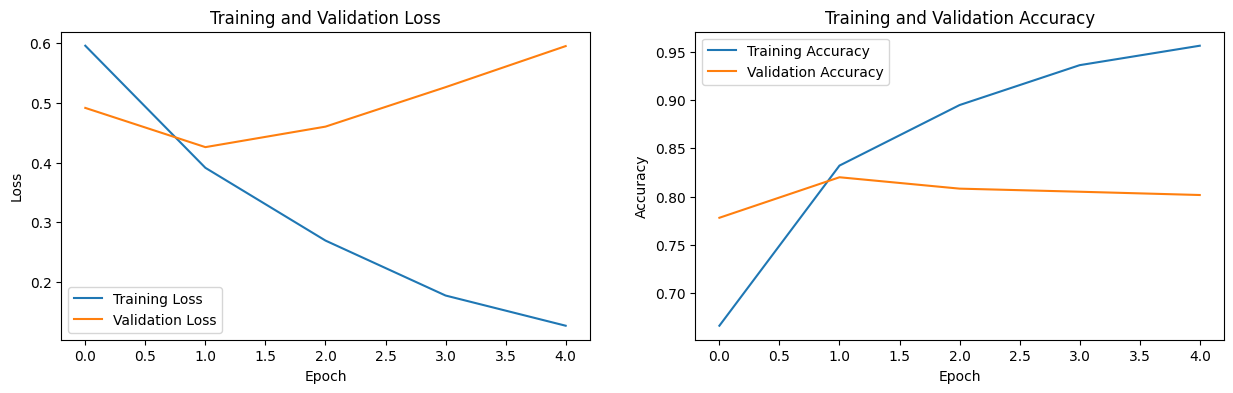

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_dRNN.history['loss'], label='Training Loss')
ax1.plot(history_dRNN.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_dRNN.history['accuracy'], label='Training Accuracy')
ax2.plot(history_dRNN.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()


## Simple Deep LSTM

In [34]:
model_dLSTM= Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(15, return_sequences=True),
    LSTM(7),
    Dense(1, activation='sigmoid')
])

model_dLSTM.summary()
model_dLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_3 (LSTM)               (None, 100, 5)            760       
                                                                 
 lstm_4 (LSTM)               (None, 100, 15)           1260      
                                                                 
 lstm_5 (LSTM)               (None, 7)                 644       
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 322,672
Trainable params: 322,672
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_dLSTM=model_dLSTM.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 74s 108ms/step - loss: 0.4701 - accuracy: 0.7672 - val_loss: 0.3787 - val_accuracy: 0.8390
Epoch 2/5
625/625 [==============================] - 77s 123ms/step - loss: 0.2800 - accuracy: 0.8885 - val_loss: 0.3558 - val_accuracy: 0.8460
Epoch 3/5
625/625 [==============================] - 82s 131ms/step - loss: 0.2021 - accuracy: 0.9244 - val_loss: 0.4063 - val_accuracy: 0.8368
Epoch 4/5
625/625 [==============================] - 71s 114ms/step - loss: 0.1458 - accuracy: 0.9496 - val_loss: 0.4369 - val_accuracy: 0.8340
Epoch 5/5
625/625 [==============================] - 92s 147ms/step - loss: 0.1031 - accuracy: 0.9661 - val_loss: 0.5701 - val_accuracy: 0.8204


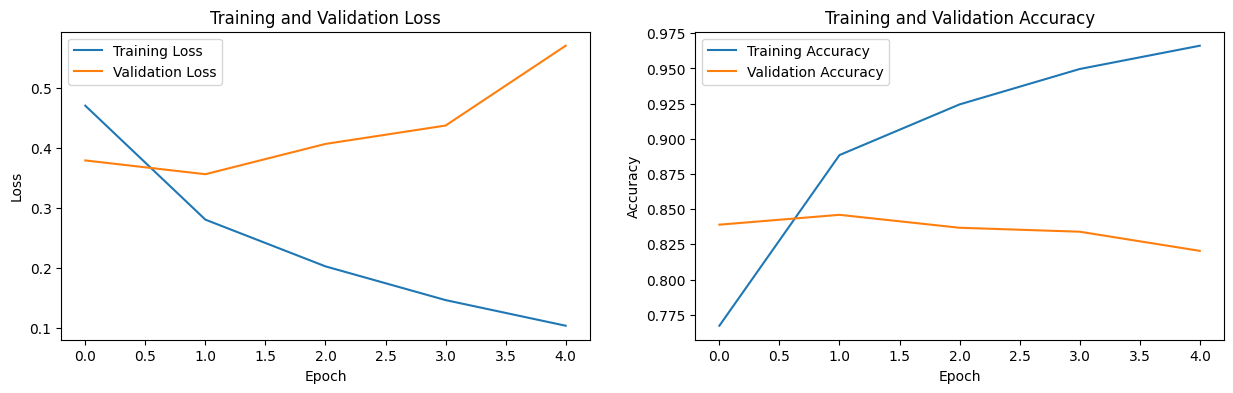

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_dLSTM.history['loss'], label='Training Loss')
ax1.plot(history_dLSTM.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_dLSTM.history['accuracy'], label='Training Accuracy')
ax2.plot(history_dLSTM.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

## Simple Deep GRU

In [37]:
model_dGRU= Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(15, return_sequences=True),
    GRU(7),
    Dense(1, activation='sigmoid')
])

model_dGRU.summary()
model_dGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru_3 (GRU)                 (None, 100, 5)            585       
                                                                 
 gru_4 (GRU)                 (None, 100, 15)           990       
                                                                 
 gru_5 (GRU)                 (None, 7)                 504       
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 322,087
Trainable params: 322,087
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_dGRU=model_dGRU.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 73s 104ms/step - loss: 0.4745 - accuracy: 0.7656 - val_loss: 0.3978 - val_accuracy: 0.8226
Epoch 2/5
625/625 [==============================] - 55s 89ms/step - loss: 0.2898 - accuracy: 0.8832 - val_loss: 0.3573 - val_accuracy: 0.8412
Epoch 3/5
625/625 [==============================] - 63s 100ms/step - loss: 0.2224 - accuracy: 0.9148 - val_loss: 0.3728 - val_accuracy: 0.8414
Epoch 4/5
625/625 [==============================] - 75s 120ms/step - loss: 0.1652 - accuracy: 0.9424 - val_loss: 0.4078 - val_accuracy: 0.8394
Epoch 5/5
625/625 [==============================] - 75s 119ms/step - loss: 0.1239 - accuracy: 0.9596 - val_loss: 0.4678 - val_accuracy: 0.8354


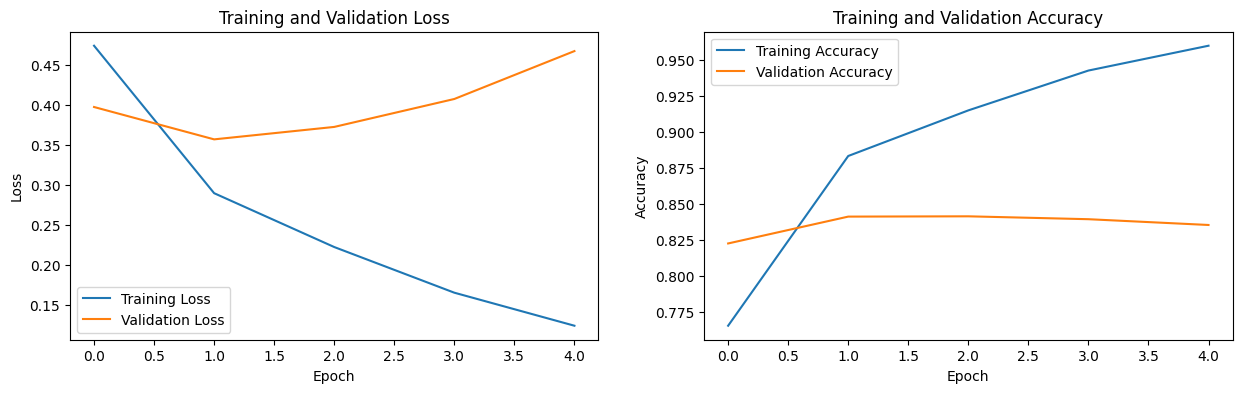

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_dGRU.history['loss'], label='Training Loss')
ax1.plot(history_dGRU.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_dGRU.history['accuracy'], label='Training Accuracy')
ax2.plot(history_dGRU.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

## Reloading Data

In [42]:
(train_df, train_target), (test_df, test_target)=   imdb.load_data(num_words=10000)

train_df=pad_sequences(train_df, maxlen=100, padding='post', truncating='post')
test_df=pad_sequences(test_df, maxlen=100,  padding='post', truncating='post')

## BiDirectional RNNs

In [43]:
model_bi_dir_RNN= Sequential([
    Embedding(10000, 32, input_length=100),
    Bidirectional(SimpleRNN(7)),
    Dense(1, activation='sigmoid')
])

model_bi_dir_RNN.summary()
model_bi_dir_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 14)               560       
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 1)                 15        
                                                                 
Total params: 320,575
Trainable params: 320,575
Non-trainable params: 0
_________________________________________________________________


In [46]:
history_bi_dir_RNN=model_bi_dir_RNN.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 29s 43ms/step - loss: 0.6277 - accuracy: 0.6533 - val_loss: 0.5754 - val_accuracy: 0.6950
Epoch 2/5
625/625 [==============================] - 27s 43ms/step - loss: 0.5129 - accuracy: 0.7501 - val_loss: 0.5297 - val_accuracy: 0.7430
Epoch 3/5
625/625 [==============================] - 27s 44ms/step - loss: 0.3578 - accuracy: 0.8523 - val_loss: 0.4905 - val_accuracy: 0.7758
Epoch 4/5
625/625 [==============================] - 28s 45ms/step - loss: 0.2413 - accuracy: 0.9081 - val_loss: 0.5380 - val_accuracy: 0.7762
Epoch 5/5
625/625 [==============================] - 29s 46ms/step - loss: 0.1637 - accuracy: 0.9436 - val_loss: 0.6093 - val_accuracy: 0.7636


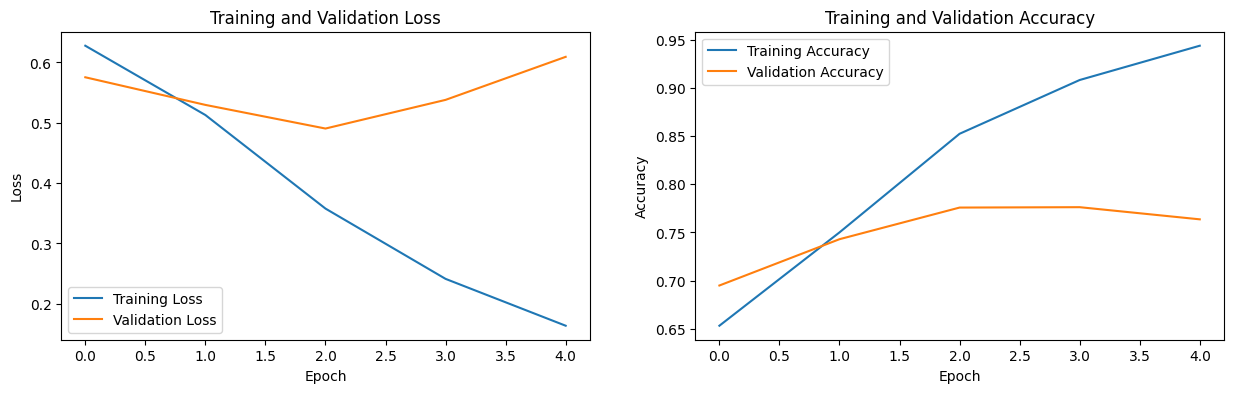

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_bi_dir_RNN.history['loss'], label='Training Loss')
ax1.plot(history_bi_dir_RNN.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_bi_dir_RNN.history['accuracy'], label='Training Accuracy')
ax2.plot(history_bi_dir_RNN.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

## BiDirectional LSTM

In [44]:
model_bi_dir_LSTM= Sequential([
    Embedding(10000, 32, input_length=100),
    Bidirectional(LSTM(7)),
    Dense(1, activation='sigmoid')
])

model_bi_dir_LSTM.summary()
model_bi_dir_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 14)               2240      
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 15        
                                                                 
Total params: 322,255
Trainable params: 322,255
Non-trainable params: 0
_________________________________________________________________


In [47]:
history_bi_dir_LSTM=model_bi_dir_LSTM.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 35s 49ms/step - loss: 0.5079 - accuracy: 0.7434 - val_loss: 0.4198 - val_accuracy: 0.8012
Epoch 2/5
625/625 [==============================] - 35s 56ms/step - loss: 0.3129 - accuracy: 0.8697 - val_loss: 0.3887 - val_accuracy: 0.8312
Epoch 3/5
625/625 [==============================] - 35s 56ms/step - loss: 0.2274 - accuracy: 0.9111 - val_loss: 0.4273 - val_accuracy: 0.8224
Epoch 4/5
625/625 [==============================] - 31s 50ms/step - loss: 0.1557 - accuracy: 0.9424 - val_loss: 0.5312 - val_accuracy: 0.8156
Epoch 5/5
625/625 [==============================] - 41s 65ms/step - loss: 0.1090 - accuracy: 0.9617 - val_loss: 0.5627 - val_accuracy: 0.8110


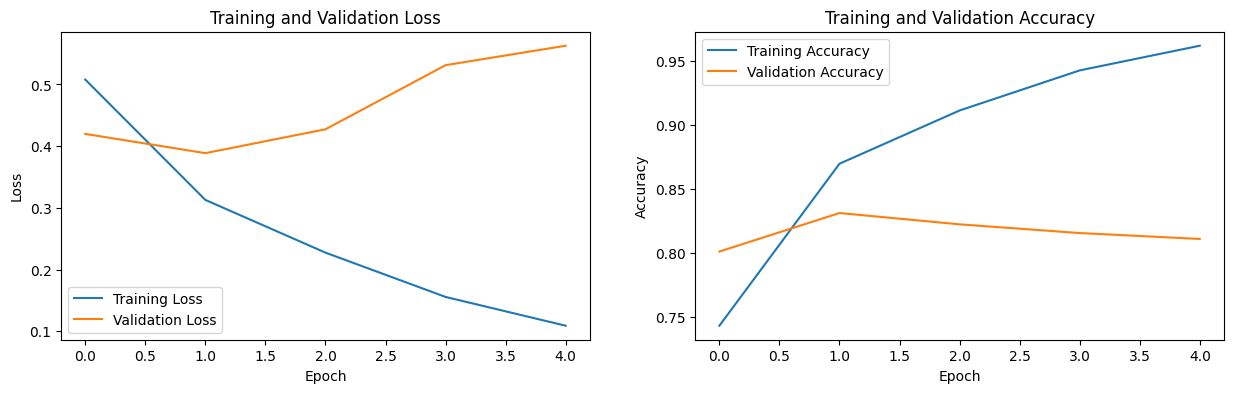

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_bi_dir_LSTM.history['loss'], label='Training Loss')
ax1.plot(history_bi_dir_LSTM.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_bi_dir_LSTM.history['accuracy'], label='Training Accuracy')
ax2.plot(history_bi_dir_LSTM.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

## BiDirectional GRU

In [45]:
model_bi_dir_GRU= Sequential([
    Embedding(10000, 32, input_length=100),
    Bidirectional(GRU(7)),
    Dense(1, activation='sigmoid')
])

model_bi_dir_GRU.summary()
model_bi_dir_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 32)           320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 14)               1722      
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 15        
                                                                 
Total params: 321,737
Trainable params: 321,737
Non-trainable params: 0
_________________________________________________________________


In [48]:
history_bi_dir_GRU=model_bi_dir_GRU.fit(train_df, train_target, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 41s 51ms/step - loss: 0.5560 - accuracy: 0.6951 - val_loss: 0.4271 - val_accuracy: 0.8076
Epoch 2/5
625/625 [==============================] - 33s 53ms/step - loss: 0.3186 - accuracy: 0.8655 - val_loss: 0.3939 - val_accuracy: 0.8300
Epoch 3/5
625/625 [==============================] - 44s 70ms/step - loss: 0.2265 - accuracy: 0.9132 - val_loss: 0.4492 - val_accuracy: 0.8114
Epoch 4/5
625/625 [==============================] - 37s 59ms/step - loss: 0.1706 - accuracy: 0.9381 - val_loss: 0.5035 - val_accuracy: 0.8034
Epoch 5/5
625/625 [==============================] - 34s 54ms/step - loss: 0.1351 - accuracy: 0.9506 - val_loss: 0.5917 - val_accuracy: 0.7990


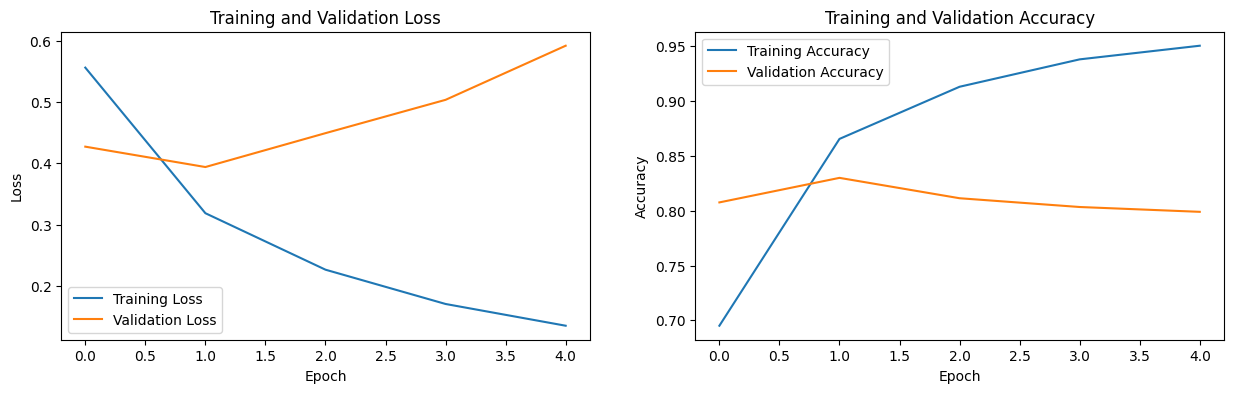

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(history_bi_dir_GRU.history['loss'], label='Training Loss')
ax1.plot(history_bi_dir_GRU.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()


ax2.plot(history_bi_dir_GRU.history['accuracy'], label='Training Accuracy')
ax2.plot(history_bi_dir_GRU.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()